<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science'
os.chdir(proj_dir)

Mounted at /content/drive


In [2]:
# Set basic info
trait = "Narcolepsy"
condition = 'Addiction Susceptibility'

In [3]:
!pip install sparse_lmm

In [4]:
geo_root = '/content/drive/MyDrive/AI4Science'

In [5]:
import gzip
import pandas as pd
import os
import io


# Process the clinical data to get the mapping between gene names and gene probes.
condition_clinical_data_path = os.path.join(geo_root, '85_Gene_DRD_Trait_AddictionSusceptibility/GSE71939/GSE71939_family.soft.gz')
with gzip.open(condition_clinical_data_path, 'rt') as f:
    contents = f.read()
# Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
condition_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
# map_data['Gene Symbol']  # Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
# map_data['ID']  # Gene probes that exit both in gene data and map data
condition_map_data = condition_map_data.loc[:,['ID','Gene Symbol']]
condition_map_data = condition_map_data.dropna()
condition_map_data

Map data:


,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
54630,AFFX-HUMGAPDH/M33197_M_at,GAPDH
54631,AFFX-HUMISGF3A/M97935_3_at,STAT1
54632,AFFX-HUMISGF3A/M97935_5_at,STAT1
54633,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [6]:
# Read gene data
condition_gene_data_path = os.path.join(geo_root, '85_Gene_DRD_Trait_AddictionSusceptibility/GSE71939/GSE71939_series_matrix.txt.gz')
condition_gene_data = pd.read_csv(condition_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("Gene Data:")
condition_gene_data = condition_gene_data.dropna()
condition_gene_data

Gene Data:


,ID_REF,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
0,1007_s_at,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
1,1053_at,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
2,117_at,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
3,121_at,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
4,1255_g_at,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,3.515940,3.539705,3.584984,3.596067,3.545027,3.440291,3.752364,3.556127,3.589279,4.144625,4.043753,4.026245,4.142930,4.053573,4.124235,4.009781,4.088837,3.941025
54671,AFFX-ThrX-M_at,3.138104,3.219658,3.195710,3.306068,3.263290,3.198293,3.219658,3.219658,3.219658,3.410841,3.542287,3.602475,3.519912,3.402759,3.521458,3.617942,3.521458,3.521458
54672,AFFX-TrpnX-3_at,2.888776,2.943802,2.963034,3.027507,3.020854,3.027979,2.983401,2.882772,2.945647,3.221371,3.172050,3.242887,3.238628,3.309539,3.189017,3.226519,3.223271,3.306297
54673,AFFX-TrpnX-5_at,3.222764,3.248620,3.451505,3.463452,3.263041,3.230397,3.367256,3.256350,3.277619,3.700380,3.626289,3.569136,3.571794,3.657908,3.744095,3.768802,3.657908,3.635227


In [7]:
# Merge two datasets
condition_gene_data = pd.merge(condition_map_data.rename(columns={'ID':'ID_REF'}), condition_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
condition_gene_data.rename(str.lower, axis='index', inplace=True)
condition_gene_data


,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Gene Symbol,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
rfc2,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
hspa6,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
pax8,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
guca1a,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.285210,13.181778,13.174343,13.311560,13.241798,13.246569,13.221085,13.184927,13.215046,13.374165,13.402090,13.329721,13.416237,13.430297,13.349765,13.367505,13.433381,13.352209
stat1,9.578593,9.149700,9.013328,9.186798,9.053712,8.966410,9.365567,8.978912,8.947200,9.551512,9.547468,9.196738,9.513483,9.441670,9.265777,9.473402,9.538221,9.243079
stat1,4.103462,3.867484,3.751517,4.012691,3.932820,3.855030,4.151565,4.022652,4.155426,4.654129,4.702240,4.519354,4.754346,4.713375,4.512929,4.857638,4.743431,4.673550


In [8]:
# Read map data between genes and gene probes.

trait_clinical_data_path = os.path.join(geo_root, '89_Gene_HCRT_Trait_Narcolepsy/GSE17617/GSE17617_family.soft.gz')

with gzip.open(trait_clinical_data_path, 'rt') as f:
    contents = f.read()
#Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
trait_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
#map_data_trait['GENE_SYMBOL']#Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
#map_data_trait['ID']#Gene probes that exit both in gene data and map data
trait_map_data = trait_map_data.loc[:,['ID','Gene Symbol']]
trait_map_data = trait_map_data.dropna()
trait_map_data

Map data:


,ID,Gene Symbol
0,1415670_at,Copg1
1,1415671_at,Atp6v0d1
2,1415672_at,Golga7
3,1415673_at,Psph
4,1415674_a_at,Trappc4
...,...,...
45069,AFFX-PyruCarbMur/L09192_MA_at,Pcx
45070,AFFX-PyruCarbMur/L09192_MB_at,Pcx
45095,AFFX-TransRecMur/X57349_3_at,Tfrc
45096,AFFX-TransRecMur/X57349_5_at,Tfrc


In [9]:
# Read gene data
trait_gene_data_path = os.path.join(geo_root, '89_Gene_HCRT_Trait_Narcolepsy/GSE17617/GSE17617_series_matrix.txt.gz')

trait_gene_data = pd.read_csv(trait_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("\nGene Data:")
trait_gene_data = trait_gene_data.dropna()
trait_gene_data


Gene Data:


,ID_REF,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
0,1415670_at,2637.59600,1854.29900,2338.80200,1864.47900,1691.56200,1412.27900,2051.56000,1531.09800,1145.73600,3677.671000,3876.25900,3396.176000,2972.68400,3654.989000,3033.57300,3322.59200,3740.68000,3084.74500
1,1415671_at,743.27470,372.10970,222.45700,342.83670,227.39110,129.90790,547.62650,407.66780,334.31250,2548.495000,2694.59500,1989.467000,2352.19800,2669.091000,2223.47400,2179.50300,3256.07000,2717.86900
2,1415672_at,2219.09600,1790.39300,3163.94700,3792.73200,3214.51700,5872.24600,3652.39100,3361.93000,3031.38300,3750.900000,4124.98100,3566.330000,4206.52000,4466.463000,3753.75500,4352.38700,4260.43500,4260.12900
3,1415673_at,483.00140,590.84580,526.11410,325.34180,414.91200,485.38140,733.13420,406.94610,430.82450,714.382900,763.98630,751.141500,742.45010,953.707000,767.01630,823.97510,793.42490,898.63950
4,1415674_a_at,45.66348,42.77694,247.30600,47.83135,34.01828,86.26760,85.51785,485.31630,76.00150,663.494400,602.14320,819.917400,631.23490,762.550500,868.29660,724.39470,842.48250,933.83370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45096,AFFX-TransRecMur/X57349_5_at,509.81710,480.76820,462.79140,633.63290,358.72370,684.48140,664.36370,762.71850,344.38420,1285.914000,1397.56300,988.066300,1111.14000,1401.472000,1177.20400,1250.24900,1368.85300,1182.11800
45097,AFFX-TransRecMur/X57349_M_at,196.41400,184.50660,198.14790,187.72850,30.65336,36.27432,129.33840,189.09950,91.71628,438.183300,435.33680,441.527300,546.12920,489.136900,509.65490,531.91880,595.81310,391.52190
45098,AFFX-TrpnX-3_at,14.34638,96.66200,27.08277,44.19871,74.12899,55.99105,63.12461,16.23195,58.36338,55.024580,38.04936,7.425402,68.37788,47.628570,51.13494,83.55426,47.47880,36.61749
45099,AFFX-TrpnX-5_at,125.50250,109.08940,18.25953,126.38880,15.39666,17.54450,39.98970,17.34576,57.28504,13.938790,62.58277,90.027380,121.77090,9.136945,28.62985,59.31858,11.97342,18.97694


In [10]:
trait_gene_data = pd.merge(trait_map_data.rename(columns={'ID':'ID_REF'}), trait_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
trait_gene_data.rename(str.lower, axis='index', inplace=True)
trait_gene_data


,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
Gene Symbol,,,,,,,,,,,,,,,,,,
copg1,2637.59600,1854.29900,2338.80200,1864.47900,1691.56200,1412.27900,2051.56000,1531.09800,1145.73600,3677.6710,3876.25900,3396.1760,2972.6840,3654.98900,3033.5730,3322.5920,3740.6800,3084.74500
atp6v0d1,743.27470,372.10970,222.45700,342.83670,227.39110,129.90790,547.62650,407.66780,334.31250,2548.4950,2694.59500,1989.4670,2352.1980,2669.09100,2223.4740,2179.5030,3256.0700,2717.86900
golga7,2219.09600,1790.39300,3163.94700,3792.73200,3214.51700,5872.24600,3652.39100,3361.93000,3031.38300,3750.9000,4124.98100,3566.3300,4206.5200,4466.46300,3753.7550,4352.3870,4260.4350,4260.12900
psph,483.00140,590.84580,526.11410,325.34180,414.91200,485.38140,733.13420,406.94610,430.82450,714.3829,763.98630,751.1415,742.4501,953.70700,767.0163,823.9751,793.4249,898.63950
trappc4,45.66348,42.77694,247.30600,47.83135,34.01828,86.26760,85.51785,485.31630,76.00150,663.4944,602.14320,819.9174,631.2349,762.55050,868.2966,724.3947,842.4825,933.83370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pcx,160.94410,302.17650,80.37859,265.19030,107.25010,248.45660,193.71990,98.50684,269.98600,162.0981,243.71720,298.6101,279.3090,226.58470,258.4336,202.1282,228.3196,130.15050
pcx,35.72246,109.64640,31.69945,55.12823,17.86674,137.42590,58.95641,160.29670,125.06070,176.0812,83.69185,115.5760,124.7047,94.72413,114.6087,159.1468,102.0021,60.08628
tfrc,287.09430,422.92500,245.03210,377.76500,158.42960,237.34830,257.84410,223.21600,250.84630,660.7780,429.48050,509.6090,749.3054,539.80680,696.8027,763.6659,566.1776,598.23030


In [11]:
genes_in_trait_data = trait_gene_data.index.tolist()
genes_in_condition_data = condition_gene_data.index.tolist()
def find_common_genes(list1, list2):
    common_elements = []
    for element1 in list1:
        if element1 in list2:
            common_elements.append(element1)
    return common_elements

common_genes = find_common_genes(genes_in_trait_data, genes_in_condition_data)
if len(common_genes):
    print(f"Both gene data have {len(common_genes)} identical genes:", common_genes)
else:
    print("No the same genes. Please find the other gene data for condition or trait!")
    # break



Both gene data have 29298 identical genes: ['copg1', 'atp6v0d1', 'golga7', 'psph', 'dpm2', 'psmb5', 'dhrs1', 'ppm1a', 'psenen', 'mrpl43', 'xpo7', 'nmt1', 'atg5', 'mtif2', 'rab14', 'psap', 'ube2g1', 'zkscan3', 'mrpl27', 'dlg1', 'canx', 'derl1', 'wars', 'psma1', 'sar1a', 'g3bp2', 'golm1', 'gps1', 'ssr3', 'ctbp1', 'huwe1', 'cdv3', 'smim7', 'copa', 'anapc2', 'tug1', 'gbf1', 'cox18', 'arfgef1', 'zranb1', 'ddx24', 'snrnp27', 'tmem129', 'rnf220', 'sap30l', 'armc1', 'mad2l1bp', 'naa60', 'vta1', 'eif5', 'cdc42', 'rrn3', 'ankrd17', 'apoa1bp', 'pabpn1', 'pdpk1', 'cpsf7', 'angel2', 'abhd16a', 'ddb1', 'pfdn5', 'rfk', 'txndc12', 'rbm42', 'psmc5', 'tmem165', 'aup1', 'hdac5', 'dscr3', 'cic', 'riok3', 'dctn5', 'rragc', 'tbl3', 'hp1bp3', 'abhd17a', 'polr2f', 'snapin', 'gbf1', 'fryl', 'lamtor5', 'atox1', 'mrpl52', 'mrpl52', 'tmem234', 'hnrnpul2', 'sec22b', 'ythdf1', 'ube2r2', 'itch', 'wdr6', 'ncl', 'ncl', 'ncl', 'elp2', 'rbbp7', 'aldh3a2', 'pnliprp1', 'morf4l2', 'armcx2', 'vps35', 'vps35', 'cct8', 'pgc',

In [12]:
# Find the genes related to the trait according to biomedical knowledge from OMIM

corresponding_gene_symbol_path = os.path.join(os.path.dirname(geo_root), 'AI4Science/Summary_Corresponding_Gene_Symbol.csv')
corresponding_gene = pd.read_csv(corresponding_gene_symbol_path)
corresponding_gene = corresponding_gene.loc[:,['Trait name','Corresponding_Gene_Symbol']].set_index('Trait name')
# Convert to lower case
corresponding_gene = corresponding_gene.apply(lambda x: x.astype(str).str.lower())
corresponding_gene.index = corresponding_gene.index.str.lower()
corresponding_gene

,Corresponding_Gene_Symbol
Trait name,
breast cancer,"brca2, cdh1, ppm1d, pik3ca, kras, akt1, tp53, ..."
cystic fibrosis,"cftr, fcgr2a, tgfb1, kif21a, cdc73, crb2, rnaset2"
obesity,"lep, pparg, pomc, mc4r, enpp1, adcy3"
sickle cell anemia,"hbb, trnt1, gata1, fancb, fanca, fancf, fancc,..."
huntington's disease,"prnp, jph3, htt, gba1, mpz, psen1, apoe, gdap1..."
...,...
metabolic rate,"adrb1, mmp1, rnf212, dyrk1b, cela2a, slc25a42,..."
von willebrand disease,"vwf, gp1ba, vwa5a, vwa7, vwce, vwc2, svep1, vw..."
werner syndrome,"wrn, wrnip1, fgfr2, fbn1, mecp2, flna, tp63, t..."


In [13]:
corresponding_gene_for_trait = corresponding_gene.loc[trait.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_trait = [gn.strip() for gn in corresponding_gene_for_trait]
print("Corresponding genes for trait", corresponding_gene_for_trait)
corresponding_gene_for_condition = corresponding_gene.loc[condition.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_condition = [gn.strip() for gn in corresponding_gene_for_condition]
print("Corresponding genes for condition", corresponding_gene_for_condition)

gene_regressors_for_condition = find_common_genes(corresponding_gene_for_condition, common_genes)
if len(gene_regressors_for_condition):
    print(f"The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. \n There are(is) {len(gene_regressors_for_condition)} regressors:", gene_regressors_for_condition)
else:
    print("No the same gene regressors. Please find the other gene data for condition or trait!")
    # break


Corresponding genes for trait ['hcrt', 'dnmt1', 'mog']
Corresponding genes for condition ['faah', 'chrna4', 'cyp2a6', 'hla-b', 'htr2a', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']
The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. 
 There are(is) 7 regressors: ['faah', 'chrna4', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']


In [14]:

#Read clinical information to get the trait. Note that clear undersanding on these information is necessary.
def extract_lines_with_prefix(file_path, prefixes):
    filtered_lines = []
    with gzip.open(file_path, 'rt') as f:
      contents = f.read()
    lines = contents.split('\n')
    for line in lines:
      line = line.strip()
      for prefix in prefixes:
        if line.startswith(prefix):
          filtered_lines.append(line)
          break
    return filtered_lines
trait_file_path = trait_gene_data_path # gene_data_path_trait
trait_prefixes = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefixes)
trait_filtered_content = '\n'.join(trait_filtered_lines)
print(trait_filtered_content + "\n")

!Series_title	"Gene profiling within the orexin-producing neurons"
!Series_summary	"Narcolepsy is a sleep disorder characterized by excessive daytime sleepiness and attacks of muscle atonia triggered by strong emotions (cataplexy). The best biological marker of narcolepsy is orexin deficiency with dramatic loss in hypothalamic orexin-producing neurons. Together with a tight HLA and T-cell receptor alpha(5) association, narcolepsy is believed to be autoimmune although all attempts to prove it have failed.To characterize orexin specific peptides we produced a transgenic mouse model to access to the orexin neurons transcription profile. We generated BAC-based transgenic mice by replacing the orexin coding sequence by a flag-tagged poly(A) binding protein (Pabp1) cDNA sequence. The basis of this construct is to take advantage of the ability of Pabp1 to bind to the poly(A) tails of mRNAs in vivo. Thus mRNAs from orexin cells are expected to be enriched by cross-linking them to the flag-tagg

In [15]:
#This is an example of manual labeling
trait_prefix = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefix)
trait_filtered_content = '\n'.join(trait_filtered_lines)
trait_clinical_data = pd.read_csv(io.StringIO(trait_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
trait_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
0,!Sample_characteristics_ch1,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J
1,!Sample_characteristics_ch1,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks


In [16]:
trait_clinical_data = trait_clinical_data.drop(trait_clinical_data.index[[0]])  # Remove the unrelated first and second rows
trait_clinical_data = trait_clinical_data.drop(columns=[trait_clinical_data.columns[0]])  # Remove the unrelated first column
trait_clinical_data.index = [trait]
trait_clinical_data


,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
Narcolepsy,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks


In [17]:
trait_clinical_data.value_counts()

GSM439868             GSM439869             GSM439870             GSM439871             GSM439872             GSM439873             GSM439874             GSM439875             GSM439876             GSM439877             GSM439878             GSM439879             GSM439880             GSM439881             GSM439882             GSM439883             GSM439884             GSM439885           
age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks  age: 11 and 14 weeks    1
dtype: int64

In [18]:
# Label the samples and remove the control group in clinical data
trait_clinical_data = trait_clinical_data.replace("group: animal without seizure", 0)
trait_clinical_data = trait_clinical_data.replace("age: 11 and 14 weeks", 1)
control_group_samples_id = trait_clinical_data.columns[trait_clinical_data.eq('group: Control').any()]
trait_clinical_data = trait_clinical_data.drop(columns=control_group_samples_id)
trait_clinical_data

,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
Narcolepsy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
#Remove the control group in gene data
trait_gene_data = trait_gene_data.drop(columns=control_group_samples_id)
trait_gene_data

,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
Gene Symbol,,,,,,,,,,,,,,,,,,
copg1,2637.59600,1854.29900,2338.80200,1864.47900,1691.56200,1412.27900,2051.56000,1531.09800,1145.73600,3677.6710,3876.25900,3396.1760,2972.6840,3654.98900,3033.5730,3322.5920,3740.6800,3084.74500
atp6v0d1,743.27470,372.10970,222.45700,342.83670,227.39110,129.90790,547.62650,407.66780,334.31250,2548.4950,2694.59500,1989.4670,2352.1980,2669.09100,2223.4740,2179.5030,3256.0700,2717.86900
golga7,2219.09600,1790.39300,3163.94700,3792.73200,3214.51700,5872.24600,3652.39100,3361.93000,3031.38300,3750.9000,4124.98100,3566.3300,4206.5200,4466.46300,3753.7550,4352.3870,4260.4350,4260.12900
psph,483.00140,590.84580,526.11410,325.34180,414.91200,485.38140,733.13420,406.94610,430.82450,714.3829,763.98630,751.1415,742.4501,953.70700,767.0163,823.9751,793.4249,898.63950
trappc4,45.66348,42.77694,247.30600,47.83135,34.01828,86.26760,85.51785,485.31630,76.00150,663.4944,602.14320,819.9174,631.2349,762.55050,868.2966,724.3947,842.4825,933.83370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pcx,160.94410,302.17650,80.37859,265.19030,107.25010,248.45660,193.71990,98.50684,269.98600,162.0981,243.71720,298.6101,279.3090,226.58470,258.4336,202.1282,228.3196,130.15050
pcx,35.72246,109.64640,31.69945,55.12823,17.86674,137.42590,58.95641,160.29670,125.06070,176.0812,83.69185,115.5760,124.7047,94.72413,114.6087,159.1468,102.0021,60.08628
tfrc,287.09430,422.92500,245.03210,377.76500,158.42960,237.34830,257.84410,223.21600,250.84630,660.7780,429.48050,509.6090,749.3054,539.80680,696.8027,763.6659,566.1776,598.23030


In [20]:

#Merge two datasets
trait_merged_data = pd.concat([trait_gene_data, trait_clinical_data]).T
# merged_data_trait
# Check whether column names are duplicated
duplicated_columns = trait_merged_data.columns[trait_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)
# Delete duplicate column names and save only one of the columns
trait_merged_data = trait_merged_data.loc[:, ~trait_merged_data.columns.duplicated()]
trait_merged_data


Duplicate column names: Index(['gbf1', 'mrpl52', 'ncl', 'ncl', 'loc101056240 /// sumo2', 'vps35',
       'ublcp1', 'ublcp1', 'spin1', 'ddr1',
       ...
       'actb', 'gapdh', 'gapdh', 'pcx', 'pcx', 'pcx', 'pcx', 'tfrc', 'tfrc',
       'tfrc'],
      dtype='object', length=17851)


,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,psenen,...,mc5r,ap2a1,adss,acrbp /// ing4,eif2b1,ppl,zmiz2,alg3,gapdh,Narcolepsy
GSM439868,2637.596,743.2747,2219.096,483.0014,45.66348,679.5574,141.129400,329.89990,1505.3820,635.0087,...,83.71928,718.8437,711.5353,363.3252,302.90230,39.17744,1018.7420,223.68730,10061.190,1.0
GSM439869,1854.299,372.1097,1790.393,590.8458,42.77694,446.4242,9.761699,111.62290,708.1030,552.6367,...,30.04660,656.9586,1322.7720,442.9117,193.07500,16.73744,1111.6380,577.42930,10447.750,1.0
GSM439870,2338.802,222.4570,3163.947,526.1141,247.30600,1054.5880,17.701610,170.30470,1680.9860,285.4238,...,102.16540,480.1629,962.3773,443.0918,64.97275,13.88384,479.5593,163.67210,8582.375,1.0
GSM439871,1864.479,342.8367,3792.732,325.3418,47.83135,557.8625,23.482830,282.39060,1766.2170,505.6704,...,102.45400,717.6602,1023.0700,233.7760,93.19024,13.99984,971.2762,138.52990,8401.005,1.0
GSM439872,1691.562,227.3911,3214.517,414.9120,34.01828,649.3644,24.728630,426.34150,1299.3640,462.9743,...,63.77678,448.8982,1261.2430,450.7373,270.89390,127.87690,358.6536,112.55970,7507.632,1.0
GSM439873,1412.279,129.9079,5872.246,485.3814,86.26760,1111.0470,22.539850,448.31330,955.0397,346.4453,...,164.93830,841.6095,1028.8380,443.2119,147.53280,17.16946,202.2038,139.19600,5276.632,1.0
GSM439874,2051.560,547.6265,3652.391,733.1342,85.51785,846.4034,70.945500,295.42270,850.9974,614.7767,...,122.78390,808.1177,1310.3230,619.0330,351.21970,89.21376,578.6367,83.54187,7944.712,1.0
GSM439875,1531.098,407.6678,3361.930,406.9461,485.31630,891.6569,9.059089,64.15476,1128.4000,291.9638,...,122.22960,486.0666,1509.1950,429.4161,82.03340,27.05395,550.6700,51.56786,8173.260,1.0
GSM439876,1145.736,334.3125,3031.383,430.8245,76.00150,727.4397,12.612510,388.51100,1817.4070,395.3838,...,204.69060,584.5370,2019.8870,474.6580,450.83790,30.20512,654.5541,148.66370,5692.136,1.0
GSM439877,3677.671,2548.4950,3750.900,714.3829,663.49440,730.0004,494.060500,1083.18100,2688.9370,928.9456,...,110.20700,1198.9460,1731.6030,438.0598,498.24270,95.27571,1319.5690,196.85720,10818.090,1.0


In [21]:
#Read clinical information. Note that clear undersanding on these information is necessary.
condition_file_path = condition_gene_data_path
prefixes_condition = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, prefixes_condition)
condition_filtered_content = '\n'.join(condition_filtered_lines)
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
print(condition_filtered_content + "\n")

!Series_title	"Expression data of SHSY5Y cells after cocaine exposure"
!Series_summary	"The aim of the study was to evaluate cocaine-induced changes in gene expression in a dopaminergic model."
!Series_summary	"Cocaine reward and reinforcing effects are mediated mainly by dopaminergic neurotransmission. In this study we aimed at evaluating gene expression changes induced by acute cocaine exposure on SH-SY5Y differentiated cells, which have been widely used as a dopaminergic neuronal model. Expression changes and a concomitant increase in neuronal activity were observed 6 hours after a 5 uM cocaine exposure, whereas no changes in gene expression nor in neuronal activity took place at 1 uM cocaine. A total of 756 differentially expressed genes, mainly related to regulation of transcription and gene expression, cell cycle, adhesion and cell projection, as well as MAPK, CREB, neurotrophin and neuregulin signaling pathways. Genes displaying altered expression were subsequently targeted with

In [22]:
#This is an example of manual labeling
condition_prefixes = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, condition_prefixes)
condition_filtered_content = '\n'.join(condition_filtered_lines)
condition_clinical_data = pd.read_csv(io.StringIO(condition_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
condition_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
0,!Sample_characteristics_ch1,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA
1,!Sample_characteristics_ch1,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [23]:
condition_clinical_data = condition_clinical_data.drop(condition_clinical_data.index[[0]])  # Remove the unrelated first and second rows
condition_clinical_data = condition_clinical_data.drop(columns=[condition_clinical_data.columns[0]])  # Remove the unrelated first column
condition_clinical_data.index = [condition]
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.
#Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
condition_clinical_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Addiction Susceptibility,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [24]:
condition_clinical_data.value_counts(normalize=True)

GSM1847671                                                                       GSM1847672                                                                       GSM1847673                                                                       GSM1847674                                                 GSM1847675                                                 GSM1847676                                                 GSM1847677                                                                       GSM1847678                                                                       GSM1847679                                                                       GSM1847680                                                                        GSM1847681                                                                        GSM1847682                                                                        GSM1847683                                                  GSM1847684                     

In [25]:
condition_clinical_data = condition_clinical_data.replace("treatment: 6 hours after a 30-min exposure to 5uM cocaine (non-treated control)", 1)
condition_clinical_data = condition_clinical_data.replace("treatment: 6 hours after a 30-min exposure to 1uM cocaine",1)
condition_clinical_data = condition_clinical_data.replace("treatment: 24 hours after a 30-min exposure to 1uM cocaine", 1)
condition_clinical_data = condition_clinical_data.replace("treatment: 24 hours after a 30-min exposure to 5uM cocaine (non-treated control)",1)
condition_clinical_data = condition_clinical_data.replace("treatment: 6 hours after a 30-min exposure to 0uM cocaine (non-treated control)", 0)
condition_clinical_data = condition_clinical_data.replace("treatment: 6 hours after a 30-min exposure to 0uM cocaine (non-treated control)", 0)
condition_clinical_data = condition_clinical_data.replace("treatment: 24 hours after a 30-min exposure to 0uM cocaine (non-treated control)",0)
condition_clinical_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Addiction Susceptibility,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1


In [26]:
NaN_Samples_id = condition_clinical_data.columns[condition_clinical_data.eq('NaN').any()]
print(NaN_Samples_id)
condition_clinical_data = condition_clinical_data.drop(columns=NaN_Samples_id)
condition_clinical_data

Index([], dtype='object')


,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Addiction Susceptibility,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1


In [27]:
#Remove the samples with NaN in gene data
condition_gene_data = condition_gene_data.drop(columns=NaN_Samples_id)
condition_gene_data


,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Gene Symbol,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
rfc2,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
hspa6,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
pax8,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
guca1a,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.285210,13.181778,13.174343,13.311560,13.241798,13.246569,13.221085,13.184927,13.215046,13.374165,13.402090,13.329721,13.416237,13.430297,13.349765,13.367505,13.433381,13.352209
stat1,9.578593,9.149700,9.013328,9.186798,9.053712,8.966410,9.365567,8.978912,8.947200,9.551512,9.547468,9.196738,9.513483,9.441670,9.265777,9.473402,9.538221,9.243079
stat1,4.103462,3.867484,3.751517,4.012691,3.932820,3.855030,4.151565,4.022652,4.155426,4.654129,4.702240,4.519354,4.754346,4.713375,4.512929,4.857638,4.743431,4.673550


In [28]:
#Merge tow data
condition_merged_data = pd.concat([condition_gene_data, condition_clinical_data]).T
condition_merged_data

,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,actb,actb,gapdh,gapdh,gapdh,stat1,stat1,stat1,stat1,Addiction Susceptibility
GSM1847671,9.301571,9.355880,3.859333,6.970233,8.209672,5.267003,6.203201,4.820422,3.283581,3.322803,...,12.611477,12.863246,13.243782,12.989029,13.285210,9.578593,4.103462,5.683587,6.934199,0.0
GSM1847672,9.318660,9.318865,3.680735,6.958087,7.915630,5.499268,6.066693,4.396142,3.241279,3.170915,...,11.817723,12.362895,13.169175,12.954543,13.181778,9.149700,3.867484,5.479388,6.063729,0.0
GSM1847673,9.242146,9.302872,3.750826,6.927173,7.548595,5.194871,5.677855,4.802796,3.259909,3.159695,...,12.075118,12.518671,13.175482,12.949568,13.174343,9.013328,3.751517,5.474981,6.057458,0.0
GSM1847674,9.331954,9.498672,3.644128,6.940049,8.312109,5.275548,6.157769,4.936201,3.445220,3.335448,...,12.299449,12.697125,13.221705,13.067787,13.311560,9.186798,4.012691,5.619514,6.267369,1.0
GSM1847675,9.359714,9.511966,3.677574,6.945966,7.950794,5.284060,6.139246,4.641787,3.350858,3.173760,...,12.376078,12.666558,13.187445,13.017793,13.241798,9.053712,3.932820,5.613877,6.188988,1.0
GSM1847676,9.306307,9.512039,3.680365,7.024712,7.756521,5.275548,6.096643,4.571559,3.555742,3.255437,...,12.410858,12.701367,13.181254,13.008852,13.246569,8.966410,3.855030,5.609884,5.994940,1.0
GSM1847677,9.229553,9.354713,3.632442,6.886061,8.292259,5.271298,6.309683,4.641787,3.352866,3.103155,...,12.605168,12.859066,13.175886,12.978586,13.221085,9.365567,4.151565,5.964216,6.665819,1.0
GSM1847678,9.414227,9.461574,3.697364,6.873566,7.939931,5.248594,6.323641,4.625939,3.269484,3.313365,...,12.447105,12.737259,13.149274,12.907638,13.184927,8.978912,4.022652,5.707031,6.289673,1.0
GSM1847679,9.304896,9.447276,3.740293,6.812068,7.727716,5.219657,6.320291,4.800101,3.423263,3.416917,...,12.497574,12.788810,13.118729,12.928776,13.215046,8.947200,4.155426,5.720992,6.263943,1.0
GSM1847680,9.385627,9.784995,4.139292,7.316451,8.535836,5.992363,6.472779,5.287749,3.713551,3.648829,...,12.506006,12.810094,13.369627,13.182244,13.374165,9.551512,4.654129,6.242443,6.809387,0.0


In [29]:
# Check whether column names are duplicated
duplicated_columns = condition_merged_data.columns[condition_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)

# Delete duplicate column names and save only one of the columns
condition_merged_data = condition_merged_data.loc[:, ~condition_merged_data.columns.duplicated()]
condition_merged_data

Duplicate column names: Index(['mapk1', 'prr22', 'pxk', 'slc46a1', 'cilp2', 'tmem106a', 'alg10',
       'gimap1', 'gimap1', 'ccdc65',
       ...
       'actb', 'actb', 'actb', 'gapdh', 'gapdh', 'gapdh', 'stat1', 'stat1',
       'stat1', 'stat1'],
      dtype='object', length=22264)


,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,minos1-nbl1 /// nbl1,nus1p3,mroh7-ttc4 /// ttc4,lime1 /// zgpat,loc102725263 /// loc389906,c1orf50 /// loc100129924,fam86b1 /// fam86b2 /// fam86c1 /// fam86dp /// fam86fp,hnrnpul2 /// hnrnpul2-bscl2,loc100505915,Addiction Susceptibility
GSM1847671,9.301571,9.355880,3.859333,6.970233,8.209672,5.267003,6.203201,4.820422,3.283581,3.322803,...,8.638197,4.075669,8.971633,7.055363,8.385405,7.985968,7.141755,6.462949,4.372719,0.0
GSM1847672,9.318660,9.318865,3.680735,6.958087,7.915630,5.499268,6.066693,4.396142,3.241279,3.170915,...,8.451719,3.738261,8.916208,6.881315,8.346264,7.932352,6.913519,5.854219,4.642532,0.0
GSM1847673,9.242146,9.302872,3.750826,6.927173,7.548595,5.194871,5.677855,4.802796,3.259909,3.159695,...,8.202712,3.733964,8.904916,6.905103,8.250712,7.847859,6.881319,6.079474,4.656043,0.0
GSM1847674,9.331954,9.498672,3.644128,6.940049,8.312109,5.275548,6.157769,4.936201,3.445220,3.335448,...,8.765693,3.811545,8.873030,7.063075,8.381406,8.115656,6.950610,6.275966,4.370201,1.0
GSM1847675,9.359714,9.511966,3.677574,6.945966,7.950794,5.284060,6.139246,4.641787,3.350858,3.173760,...,8.472918,3.922352,8.906366,6.962384,8.377947,8.097283,6.891617,6.168075,4.600634,1.0
GSM1847676,9.306307,9.512039,3.680365,7.024712,7.756521,5.275548,6.096643,4.571559,3.555742,3.255437,...,8.292676,3.723412,8.961375,6.785115,8.187670,7.994450,6.905474,6.146526,4.544547,1.0
GSM1847677,9.229553,9.354713,3.632442,6.886061,8.292259,5.271298,6.309683,4.641787,3.352866,3.103155,...,8.621234,4.152517,8.882111,6.981661,8.565476,7.959883,6.870517,6.468227,4.382117,1.0
GSM1847678,9.414227,9.461574,3.697364,6.873566,7.939931,5.248594,6.323641,4.625939,3.269484,3.313365,...,8.464476,3.984392,8.866079,6.759388,8.421624,8.022619,6.893076,6.348633,4.404102,1.0
GSM1847679,9.304896,9.447276,3.740293,6.812068,7.727716,5.219657,6.320291,4.800101,3.423263,3.416917,...,8.169479,4.138459,8.888374,6.861270,8.521701,7.975107,6.875629,6.307501,4.296765,1.0
GSM1847680,9.385627,9.784995,4.139292,7.316451,8.535836,5.992363,6.472779,5.287749,3.713551,3.648829,...,8.735832,4.376423,9.092333,7.064813,8.584640,8.129650,6.927928,6.640506,5.026877,0.0


In [30]:
gene_regressors_for_condition

['faah', 'chrna4', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']

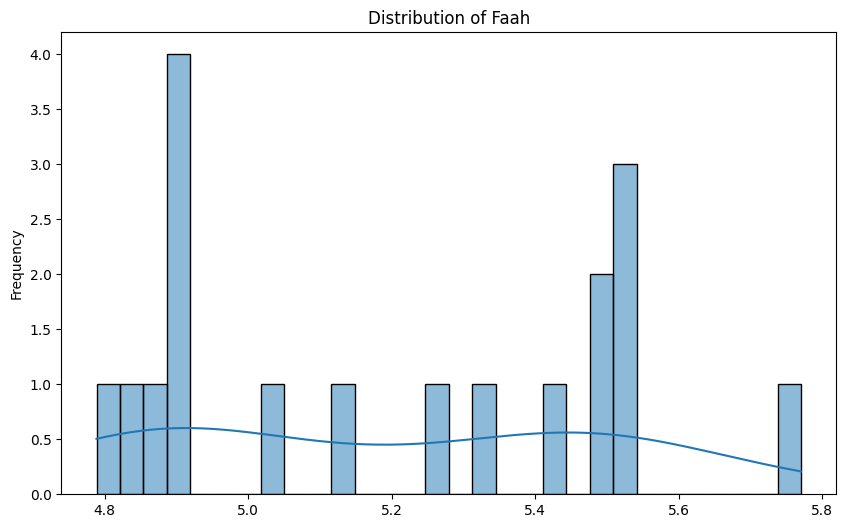

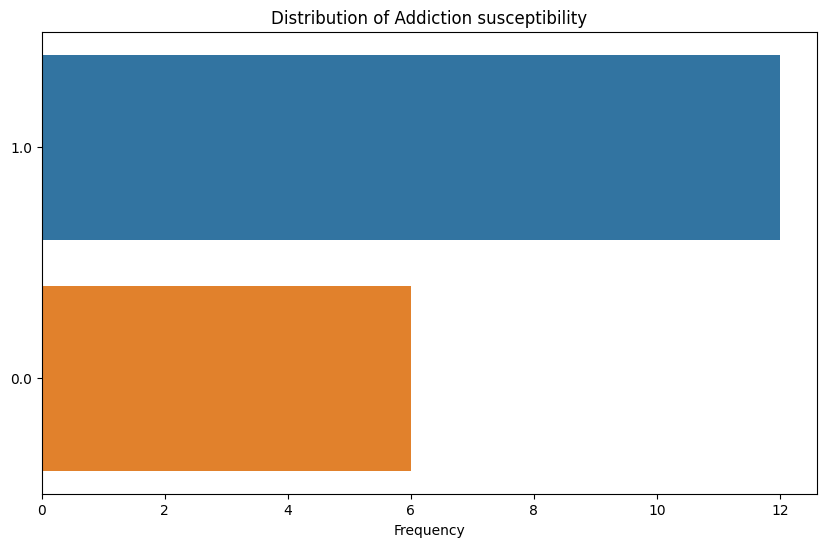

In [31]:
condition_feature_cols = condition_merged_data.columns.tolist()[:-1]
gene_list = [gene_regressors_for_condition[0]] # Only show one gene
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(condition_merged_data, numerical_columns=[ *gene_list], categorical_columns=[condition])

In [32]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)


    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [33]:
from sklearn.linear_model import LogisticRegression

def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Instantiate LogisticRegression with L1 regularization
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

        # Fit the logistic regression model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        binary_predictions = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

data_array_condition = condition_merged_data[gene_regressors_for_condition].values

# Normalize data
X_condition = data_array_condition
# print(X_condition.shape)

y_condition = condition_merged_data[condition].values
# print(y_condition.shape)
print(cross_validation(X_condition, y_condition))


0.5333333333333333


In [34]:
# Select relevant columns and convert to numpy array
print("Common gene regressors for condition and trait", gene_regressors_for_condition)
data_array_condition = condition_merged_data[gene_regressors_for_condition].values


# Normalize data
X_condition = data_array_condition
X_condition, _ = preprocess_data(X_condition)

y_condition = condition_merged_data[condition].values
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_condition, y_condition)
# Implementing k-fold cross-validation

Common gene regressors for condition and trait ['faah', 'chrna4', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [35]:
# Select relevant columns and convert to numpy array
data_array_common_regressors = trait_merged_data[gene_regressors_for_condition].values.astype(float)
#print(data_array_common_regressors)

X_common_regressors = data_array_common_regressors
X_common_regressors, _ = preprocess_data(X_common_regressors)

predictions_condition = model.predict_proba(X_common_regressors)[:, 1]

In [36]:

#Add the predicted condition to the gene data for trait
trait_merged_data.insert(0, condition, predictions_condition)
trait_merged_data = trait_merged_data.drop(columns=gene_regressors_for_condition)
trait_merged_data

,Addiction Susceptibility,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,mc5r,ap2a1,adss,acrbp /// ing4,eif2b1,ppl,zmiz2,alg3,gapdh,Narcolepsy
GSM439868,0.551460,2637.596,743.2747,2219.096,483.0014,45.66348,679.5574,141.129400,329.89990,1505.3820,...,83.71928,718.8437,711.5353,363.3252,302.90230,39.17744,1018.7420,223.68730,10061.190,1.0
GSM439869,0.676565,1854.299,372.1097,1790.393,590.8458,42.77694,446.4242,9.761699,111.62290,708.1030,...,30.04660,656.9586,1322.7720,442.9117,193.07500,16.73744,1111.6380,577.42930,10447.750,1.0
GSM439870,0.656188,2338.802,222.4570,3163.947,526.1141,247.30600,1054.5880,17.701610,170.30470,1680.9860,...,102.16540,480.1629,962.3773,443.0918,64.97275,13.88384,479.5593,163.67210,8582.375,1.0
GSM439871,0.635824,1864.479,342.8367,3792.732,325.3418,47.83135,557.8625,23.482830,282.39060,1766.2170,...,102.45400,717.6602,1023.0700,233.7760,93.19024,13.99984,971.2762,138.52990,8401.005,1.0
GSM439872,0.667676,1691.562,227.3911,3214.517,414.9120,34.01828,649.3644,24.728630,426.34150,1299.3640,...,63.77678,448.8982,1261.2430,450.7373,270.89390,127.87690,358.6536,112.55970,7507.632,1.0
GSM439873,0.683177,1412.279,129.9079,5872.246,485.3814,86.26760,1111.0470,22.539850,448.31330,955.0397,...,164.93830,841.6095,1028.8380,443.2119,147.53280,17.16946,202.2038,139.19600,5276.632,1.0
GSM439874,0.687520,2051.560,547.6265,3652.391,733.1342,85.51785,846.4034,70.945500,295.42270,850.9974,...,122.78390,808.1177,1310.3230,619.0330,351.21970,89.21376,578.6367,83.54187,7944.712,1.0
GSM439875,0.717139,1531.098,407.6678,3361.930,406.9461,485.31630,891.6569,9.059089,64.15476,1128.4000,...,122.22960,486.0666,1509.1950,429.4161,82.03340,27.05395,550.6700,51.56786,8173.260,1.0
GSM439876,0.723472,1145.736,334.3125,3031.383,430.8245,76.00150,727.4397,12.612510,388.51100,1817.4070,...,204.69060,584.5370,2019.8870,474.6580,450.83790,30.20512,654.5541,148.66370,5692.136,1.0
GSM439877,0.572569,3677.671,2548.4950,3750.900,714.3829,663.49440,730.0004,494.060500,1083.18100,2688.9370,...,110.20700,1198.9460,1731.6030,438.0598,498.24270,95.27571,1319.5690,196.85720,10818.090,1.0


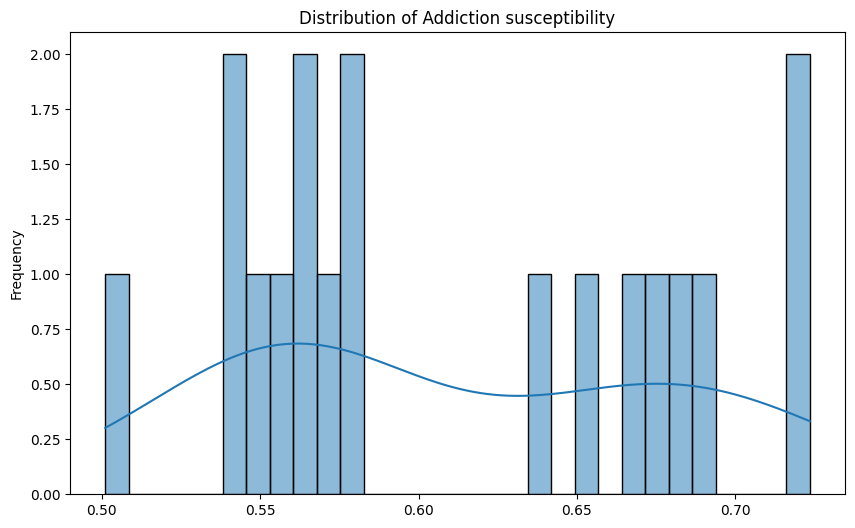

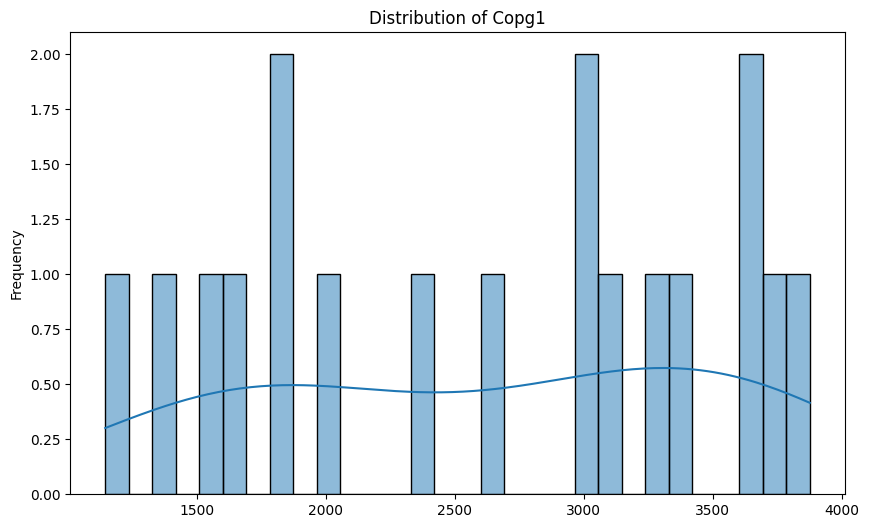

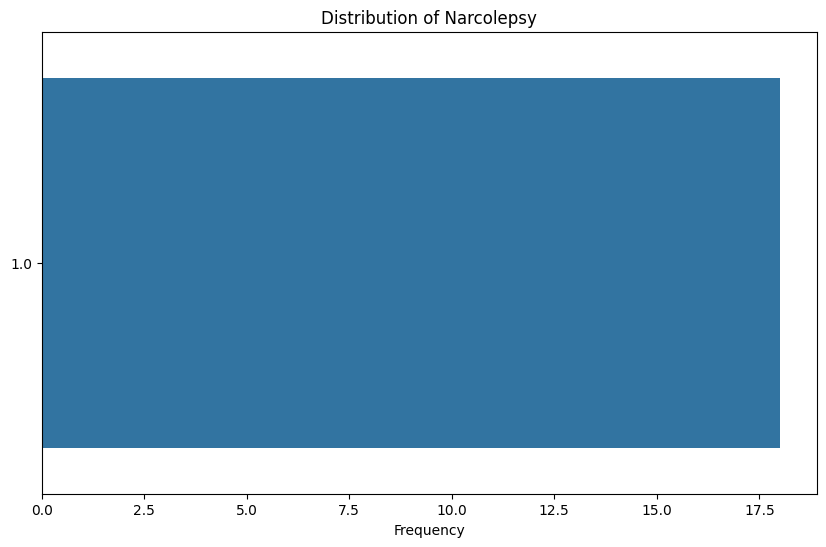

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
trait_feature_cols = trait_merged_data.columns.tolist()[:-1]
gene_list = [trait_feature_cols[1]] # [col for col in input_cols if gene in col.lower()]

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(trait_merged_data, numerical_columns=[condition,*gene_list], categorical_columns=[trait])

In [38]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection


# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []


    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)


# Select relevant columns and convert to numpy array
X_trait = trait_merged_data.drop(columns=[trait]).astype('float').values
y_trait = trait_merged_data[trait].values
print(X_trait, X_trait.dtype, )
cv_mean, cv_std = cross_validation(X_trait, y_trait)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')




[[5.51459773e-01 2.63759600e+03 7.43274700e+02 ... 1.01874200e+03
  2.23687300e+02 1.00611900e+04]
 [6.76565365e-01 1.85429900e+03 3.72109700e+02 ... 1.11163800e+03
  5.77429300e+02 1.04477500e+04]
 [6.56187876e-01 2.33880200e+03 2.22457000e+02 ... 4.79559300e+02
  1.63672100e+02 8.58237500e+03]
 ...
 [5.63029192e-01 3.32259200e+03 2.17950300e+03 ... 1.01873800e+03
  1.12138800e+02 9.18149500e+03]
 [5.58527808e-01 3.74068000e+03 3.25607000e+03 ... 9.43865300e+02
  2.37077200e+02 1.37800000e+04]
 [5.82604911e-01 3.08474500e+03 2.71786900e+03 ... 9.20505600e+02
  1.30584600e+02 1.09777500e+04]] float64


/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 0.00% ± 0.00%


In [39]:
len(X_trait)

18

In [40]:
np.where(np.any(X_trait.astype(float) != X_trait, axis=0))[0]

array([], dtype=int64)

In [41]:
arr = np.std(X_trait, axis=0).tolist()

In [42]:
from traitlets.traitlets import Instance
for i in list(arr):
  if not isinstance(i,float):
    print(i)

In [43]:
X_trait[~np.isin(X_trait.astype(float), X_trait)]

array([], dtype=float64)

In [44]:
trait_merged_data

,Addiction Susceptibility,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,mc5r,ap2a1,adss,acrbp /// ing4,eif2b1,ppl,zmiz2,alg3,gapdh,Narcolepsy
GSM439868,0.551460,2637.596,743.2747,2219.096,483.0014,45.66348,679.5574,141.129400,329.89990,1505.3820,...,83.71928,718.8437,711.5353,363.3252,302.90230,39.17744,1018.7420,223.68730,10061.190,1.0
GSM439869,0.676565,1854.299,372.1097,1790.393,590.8458,42.77694,446.4242,9.761699,111.62290,708.1030,...,30.04660,656.9586,1322.7720,442.9117,193.07500,16.73744,1111.6380,577.42930,10447.750,1.0
GSM439870,0.656188,2338.802,222.4570,3163.947,526.1141,247.30600,1054.5880,17.701610,170.30470,1680.9860,...,102.16540,480.1629,962.3773,443.0918,64.97275,13.88384,479.5593,163.67210,8582.375,1.0
GSM439871,0.635824,1864.479,342.8367,3792.732,325.3418,47.83135,557.8625,23.482830,282.39060,1766.2170,...,102.45400,717.6602,1023.0700,233.7760,93.19024,13.99984,971.2762,138.52990,8401.005,1.0
GSM439872,0.667676,1691.562,227.3911,3214.517,414.9120,34.01828,649.3644,24.728630,426.34150,1299.3640,...,63.77678,448.8982,1261.2430,450.7373,270.89390,127.87690,358.6536,112.55970,7507.632,1.0
GSM439873,0.683177,1412.279,129.9079,5872.246,485.3814,86.26760,1111.0470,22.539850,448.31330,955.0397,...,164.93830,841.6095,1028.8380,443.2119,147.53280,17.16946,202.2038,139.19600,5276.632,1.0
GSM439874,0.687520,2051.560,547.6265,3652.391,733.1342,85.51785,846.4034,70.945500,295.42270,850.9974,...,122.78390,808.1177,1310.3230,619.0330,351.21970,89.21376,578.6367,83.54187,7944.712,1.0
GSM439875,0.717139,1531.098,407.6678,3361.930,406.9461,485.31630,891.6569,9.059089,64.15476,1128.4000,...,122.22960,486.0666,1509.1950,429.4161,82.03340,27.05395,550.6700,51.56786,8173.260,1.0
GSM439876,0.723472,1145.736,334.3125,3031.383,430.8245,76.00150,727.4397,12.612510,388.51100,1817.4070,...,204.69060,584.5370,2019.8870,474.6580,450.83790,30.20512,654.5541,148.66370,5692.136,1.0
GSM439877,0.572569,3677.671,2548.4950,3750.900,714.3829,663.49440,730.0004,494.060500,1083.18100,2688.9370,...,110.20700,1198.9460,1731.6030,438.0598,498.24270,95.27571,1319.5690,196.85720,10818.090,1.0


In [45]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

#X_trait = trait_merged_data.values
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
X_trait, _ = preprocess_data(X_trait)

# Fit the model
var_select.fit(X_trait, y_trait)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

In [46]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': trait_feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: Addiction Susceptibility
Coefficient: -0.0000
p-value: 0.0004982



In [47]:
threshold = 0.4

# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")


Genes with corrected p-value < 0.4, affecting the trait Narcolepsy conditional on the factor Addiction Susceptibility, sorted by corrected p-value:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Found 21808 significant genes with corrected p-value < 0.4
